## DSC530 Data Exploration and Analysis 
## Pavel Makarov
## Analysis of Electric Vehicles
### 2023-11-01

##### As an electric vehicle owner, I've always been intrigued by the dynamic landscape of this industry. With numerous cutting-edge technologies continually emerging, a multitude of startup EV companies joining the fray, and automotive giants like BMW and Mercedes also diving headfirst into electric mobility, the field is vibrant and evolving. My curiosity led me to explore and analyze the current electric vehicle market, questioning whether Tesla genuinely provides the best value – whether its technology aligns appropriately with its perceived worth. To conduct this analysis, I've sourced data from Kaggle.com, a platform known for its wealth of datasets. This examination aims to delve into various aspects, including vehicle prices, top speed, fast charging capabilities, range, efficiency, and acceleration, to comprehensively assess the comparative value proposition offered by Tesla in the ever-expanding electric vehicle market. I will test a hypothesis that Tesla produces faster cars than other manufacturers. The  maiin question to adress here are Tesla cars faster than the other EVs. Also, I want to see if a can generate a model that will predict the car price based on the top speed, accelration, battery range and efficiency.
##### Link  to the data set https://www.kaggle.com/datasets/geoffnel/evs-one-electric-vehicle-dataset

In [3]:
# Import all necessary packages to perform EDA
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import linregress
from scipy import stats

In [4]:
# Download the data set into Jupyter enviroment
file_path = r'C:\Users\Pasha\ThinkStats2-master\ElectricCarData_Clean.csv'
ev_data = pd.read_csv(file_path)

In [5]:
ev_data.head(10)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
5,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
6,Volkswagen,e-Golf,9.6,150,190,168,220,Yes,FWD,Type 2 CCS,Hatchback,C,5,31900
7,Peugeot,e-208,8.1,150,275,164,420,Yes,FWD,Type 2 CCS,Hatchback,B,5,29682
8,Tesla,Model 3 Standard Range Plus,5.6,225,310,153,650,Yes,RWD,Type 2 CCS,Sedan,D,5,46380
9,Audi,Q4 e-tron,6.3,180,400,193,540,Yes,AWD,Type 2 CCS,SUV,D,5,55000


In [6]:
ev_data.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

## Variables Description

In [7]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


### Variables
Brand - Automobile maker - string format variable
Model - Model of the auto

For the analysis I selected next variables:
AccelSec - Time to accelarate car to 100 km/h - floating number  

TopSpeed_KmH - The highest speed car can reach - integer  

Range_Km - The distance car can run on the full charge - integer  

Efficiency_WhK - Efficiany of the car - aka how many Whatts per km car needs- integer   

PriceEuro - price of the car - integer  


Also, I will consider looking into RapidCharge variable but I would need to connvert it into numeric values.

## Histograms  of  the  Variables

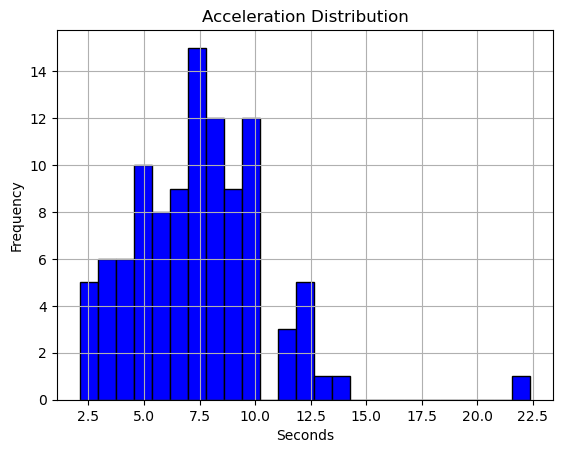

In [8]:
plt.hist(ev_data["AccelSec"], bins=25, edgecolor='black', color='blue')
plt.title('Acceleration Distribution')
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### The distribution exhibits a normal pattern characterized by a single mode, yet a noticeable gap emerges around the 11-second mark. Additionally, the acceleration histogram reveals a segment with remarkably high values, centered around the 22.5-second range. A comprehensive analysis of all histograms is requires to assess this particular car model and determine whether it exhibits outlier behavior in other parameters as well.

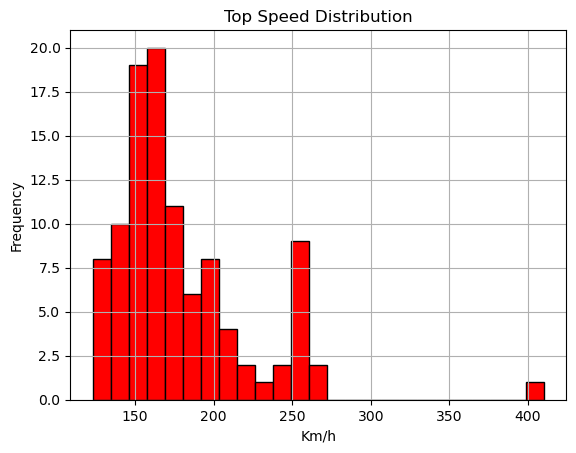

In [9]:
plt.hist(ev_data["TopSpeed_KmH"], bins=25, edgecolor='black', color='red')
plt.title('Top Speed Distribution')
plt.xlabel('Km/h')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### This distribution is bimodal, displaying two distinct modes—one around 160 km/h and another approximately at 260 km/h. Notably, there is an exceptional value recorded at an astonishing 400 km/h. A thorough examination of this outlier will be undertaken as part of the comprehensive analysis of all histograms.

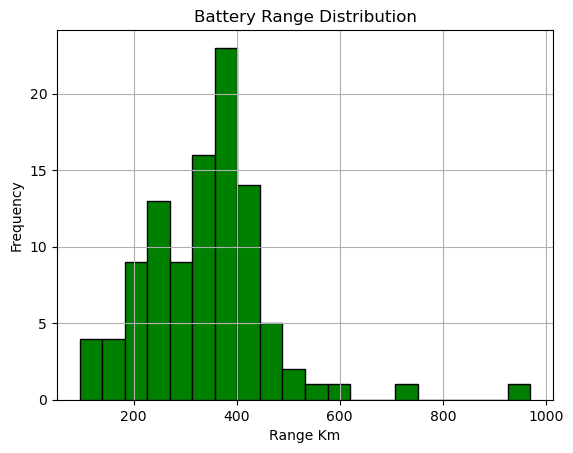

In [14]:
plt.hist(ev_data["Range_Km"], bins=20, edgecolor='black', color='green')
plt.title('Battery Range Distribution')
plt.xlabel('Range Km')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### The histogram representing the distribution of battery range exhibits a somewhat normal distribution with a positive skewness. Notably, there are a couple of outstanding values recorded at approximately 780 and 900 km range.  

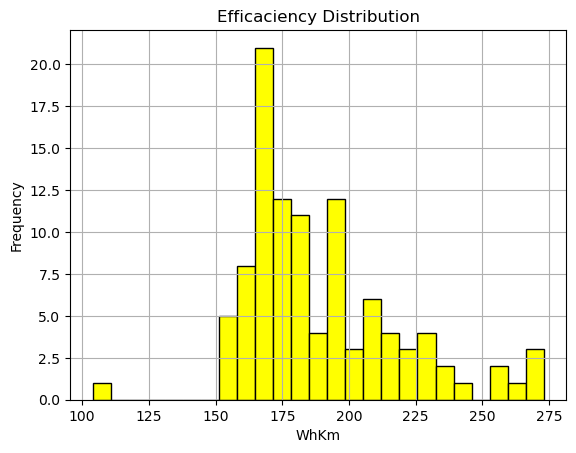

In [15]:
plt.hist(ev_data["Efficiency_WhKm"], bins=25, edgecolor='black', color='yellow')
plt.title('Efficaciency Distribution')
plt.xlabel('WhKm')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#####  The histogram illustrating the distribution of efficiency demonstrates a somewhat normal distribution, featuring a couple of notable outliers around the 110 Wh/Km value.

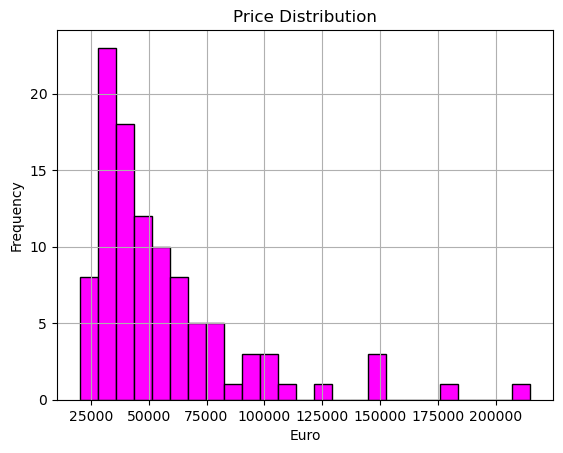

In [11]:
plt.hist(ev_data["PriceEuro"], bins=25, edgecolor='black', color='magenta')
plt.title('Price Distribution')
plt.xlabel('Euro')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##### The distribution of the price is skewed to the left with  a single mode  around 30000 euros price

In [16]:
columns_max_outliers = ['AccelSec', 'TopSpeed_KmH', 'PriceEuro', 'Range_Km']
columns_min_outliers = ['Efficiency_WhKm']
max_values = ev_data[columns_max_outliers].max()
min_values = ev_data[columns_min_outliers].min()
mask1 = ev_data[columns_max_outliers].eq(max_values).any(axis=1)
mask2 = ev_data[columns_min_outliers].eq(min_values).any(axis=1)
rows_with_max_values = ev_data[mask1]
rows_with_min_values = ev_data[mask2]
print("Rows with Maximum Values:")
print(rows_with_max_values)

print("Rows with Minimum Efficiency Values:")
print(rows_with_min_values)

Rows with Maximum Values:
       Brand              Model  AccelSec  TopSpeed_KmH  Range_Km  \
51    Tesla           Roadster        2.1           410       970   
68  Renault   Kangoo Maxi ZE 33      22.4           130       160   

    Efficiency_WhKm FastCharge_KmH RapidCharge PowerTrain    PlugType  \
51              206            920         Yes        AWD  Type 2 CCS   
68              194              -          No        FWD      Type 2   

   BodyStyle Segment  Seats  PriceEuro  
51    Cabrio       S      4     215000  
68       SPV       N      5      38000  
Rows with Minimum Efficiency Values:
         Brand Model  AccelSec  TopSpeed_KmH  Range_Km  Efficiency_WhKm  \
48  Lightyear   One       10.0           150       575              104   

   FastCharge_KmH RapidCharge PowerTrain    PlugType BodyStyle Segment  Seats  \
48            540         Yes        AWD  Type 2 CCS  Liftback       F      5   

    PriceEuro  
48     149000  


##### Upon thorough analysis of the outliers, I have identified several variables for the Tesla Roadster that deviate significantly—specifically, acceleration, top speed, and price. Following a comprehensive examination of this car model, I have opted to exclude it from the overall analysis. This decision is based on the understanding that the Tesla Roadster is a technically exclusive vehicle and does not align with the characteristics of mass-market cars. However, I have chosen to retain the outlier in acceleration and efficiency since it provides valuable insights into the market, and are representative of the goals of this analysis.

### Cleaned Data Set and Updated Histograms


In [18]:
ev_data_exc = ev_data.drop(index = 51)

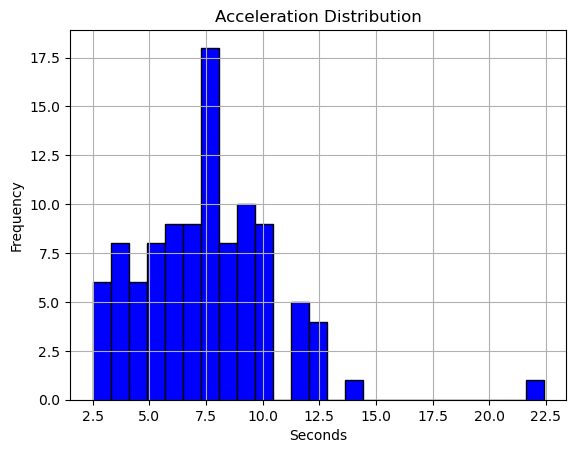

In [19]:
plt.hist(ev_data_exc["AccelSec"], bins=25, edgecolor='black', color='blue')
plt.title('Acceleration Distribution')
plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

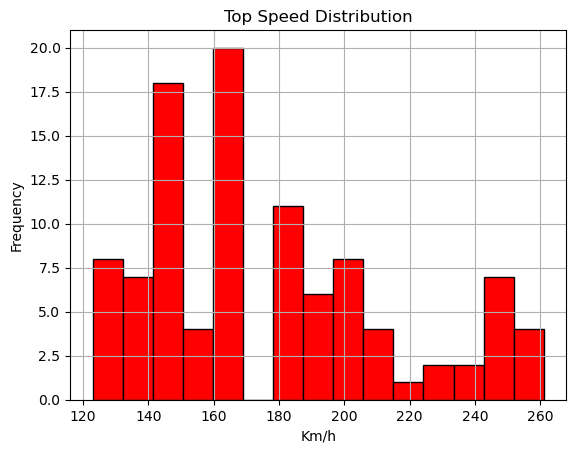

In [20]:
plt.hist(ev_data_exc["TopSpeed_KmH"], bins=15, edgecolor='black', color='red')
plt.title('Top Speed Distribution')
plt.xlabel('Km/h')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

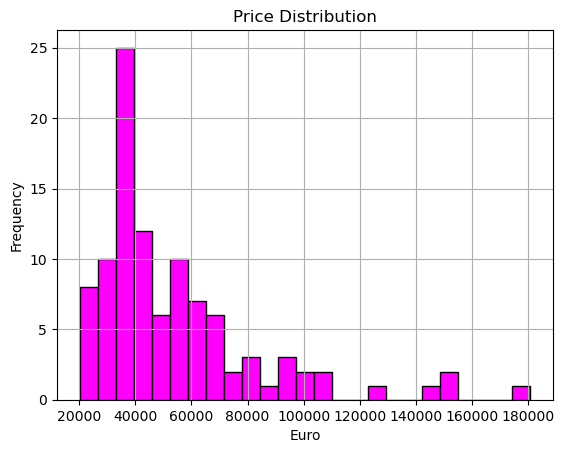

In [21]:
plt.hist(ev_data_exc["PriceEuro"], bins=25, edgecolor='black', color='magenta')
plt.title('Price Distribution')
plt.xlabel('Euro')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

##  Mean, Mode, Spread and  Tails

In [22]:
price_mean = ev_data_exc["PriceEuro"].mean()
price_mode1 = ev_data_exc["PriceEuro"].mode().iloc[0]
price_spread = ev_data_exc["PriceEuro"].max() - ev_data_exc["PriceEuro"].min()
price_tails = ev_data_exc["PriceEuro"].quantile([0.25, 0.75])
price_var = ev_data_exc.PriceEuro.var()
price_stdev = ev_data_exc.PriceEuro.std()

print("Mean of the price:", price_mean)
print("Standard deviation of the price:", price_stdev)
print("Mode of the price:", price_mode1)
print("Spread of the price:",price_spread )
print("Tails of the price:",price_tails)
print("Variance of the price:", price_var)




Mean of the price: 54250.89215686275
Standard deviation of the price: 30386.697343145053
Mode of the price: 45000
Spread of the price: 160652
Tails of the price: 0.25    34414.75
0.75    64750.00
Name: PriceEuro, dtype: float64
Variance of the price: 923351375.4238986


In [23]:
accel_mean = ev_data_exc["AccelSec"].mean()
accel_mode1 = ev_data_exc["AccelSec"].mode().iloc[0] 
accel_spread = ev_data_exc["AccelSec"].max() - ev_data_exc["AccelSec"].min()
accel_tails = ev_data_exc["AccelSec"].quantile([0.25, 0.75])
accel_var = ev_data_exc.AccelSec.var()
accel_stdev = ev_data_exc.AccelSec.std()

print("Mean of the accelaration:", accel_mean)
print("Standard deviation of the accelaration:", accel_stdev)
print("Mode of the accelaration:", accel_mode1)
print("Spread of the accelaration:",accel_spread )
print("Tails of the accelaration:",accel_tails )
print("Variance of the accelaration:", accel_var)


Mean of the accelaration: 7.448039215686274
Standard deviation of the accelaration: 2.985732753890546
Mode of the accelaration: 9.0
Spread of the accelaration: 19.9
Tails of the accelaration: 0.25    5.2
0.75    9.0
Name: AccelSec, dtype: float64
Variance of the accelaration: 8.914600077654825


In [24]:
speed_mean = ev_data_exc["TopSpeed_KmH"].mean()
speed_mode1 = ev_data_exc["TopSpeed_KmH"].mode().iloc[0]  
speed_mode2 = ev_data_exc["TopSpeed_KmH"].mode().iloc[1]  
speed_spread = ev_data_exc["TopSpeed_KmH"].max() - ev_data_exc["TopSpeed_KmH"].min()
speed_tails = ev_data_exc["TopSpeed_KmH"].quantile([0.25, 0.75])
speed_var = ev_data_exc.TopSpeed_KmH.var()
speed_stdev = ev_data_exc.TopSpeed_KmH.std()

print("Mean of the top speed:", speed_mean)
print("Standard deviation of the top speed:", speed_stdev)
print("First mode of the top speed:", speed_mode1)
print("Second mode of the top speed:", speed_mode2)
print("Spread of the top speed:",speed_spread )
print("Tails of the top speed:",speed_tails )
print("Variance of the top speed:", speed_var)

Mean of the top speed: 176.9313725490196
Standard deviation of the top speed: 37.21286368770929
First mode of the top speed: 150
Second mode of the top speed: 160
Spread of the top speed: 138
Tails of the top speed: 0.25    150.0
0.75    200.0
Name: TopSpeed_KmH, dtype: float64
Variance of the top speed: 1384.7972238400325


In [25]:
range_mean = ev_data_exc['Range_Km'].mean()
range_mode = ev_data_exc['Range_Km'].mode().iloc[0]  
range_spread = ev_data_exc['Range_Km'].max() - ev_data_exc['Range_Km'].min()
range_tails = ev_data_exc['Range_Km'].quantile([0.25, 0.75])
range_var = ev_data_exc.Range_Km.var()
range_stdev = ev_data_exc.Range_Km.std()

print("Mean of the range:", range_mean)
print("Standard deviation of the range:", range_stdev)
print("Mode of the range:", range_mode)
print("Spread of the range:",range_spread )
print("Tails of the range:",range_tails )
print("Variance of the top range:", range_var)

Mean of the range: 332.5980392156863
Standard deviation of the range: 109.78766723683208
Mode of the range: 250
Spread of the range: 655
Tails of the range: 0.25    250.0
0.75    400.0
Name: Range_Km, dtype: float64
Variance of the top range: 12053.33187730537


## Comparison Histograms and  PMF plots 

###### I have now segregated the data into two categories: Tesla and other manufacturers. The objective is to examine whether Tesla vehicles exhibit the fastest cars with the highest acceleration and the best battery range.

In [26]:

tesla = ev_data_exc[ev_data_exc.Brand == "Tesla "]
others = ev_data_exc[ev_data_exc.Brand != "Tesla "]


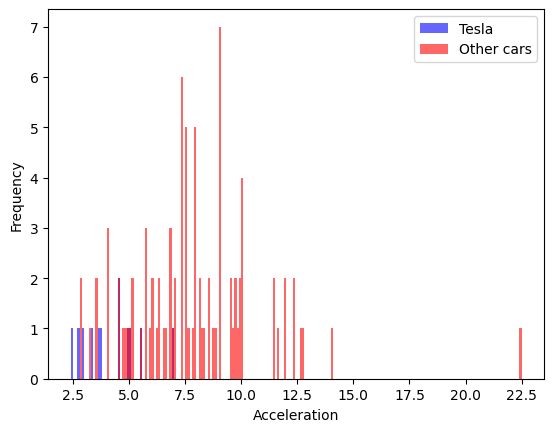

<Figure size 800x600 with 0 Axes>

In [39]:

tesla_hist = thinkstats2.Hist(tesla.AccelSec)
others_hist = thinkstats2.Hist(others.AccelSec)

thinkplot.PrePlot(2)
thinkplot.Hist(tesla_hist, align = 'right', width = 0.1, color = 'blue', label = 'Tesla')
thinkplot.Hist(others_hist, align = 'left', width = 0.1, color = 'red', label = "Other cars")
thinkplot.Show(xlabel = 'Acceleration', ylabel ='Frequency')

##### Visualizing two distributions is relatively complex due to a couple of factors. First, there is an outstanding value for acceleration. Secondly, the proportion of Teslas relative to other cars is small. To facilitate a clearer visualization, I will exclude the outlier, aiming for a more refined representation of the data  to calculate  PMF and plot the distribution for acceleratio ncomparison.







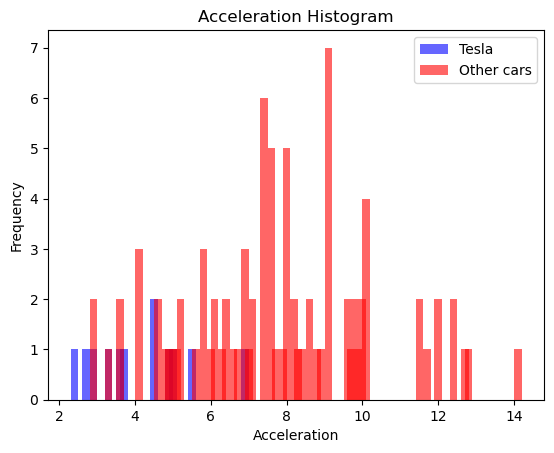

<Figure size 800x600 with 0 Axes>

In [50]:
ev_data_exc2 = ev_data_exc.drop(index = 68)


tesla2 = ev_data_exc2[ev_data_exc2.Brand == "Tesla "]
others2 = ev_data_exc2[ev_data_exc2.Brand != "Tesla "]

tesla_hist2 = thinkstats2.Hist(tesla2.AccelSec)
others_hist2 = thinkstats2.Hist(others2.AccelSec)

thinkplot.PrePlot(2)
thinkplot.Hist(tesla_hist2, align = 'right', width = 0.2, color = 'blue', label = 'Tesla')
thinkplot.Hist(others_hist2, align = 'left', width = 0.2, color = 'red', label = "Other cars")
thinkplot.Show(xlabel = 'Acceleration', ylabel ='Frequency', title = "Acceleration Histogram")

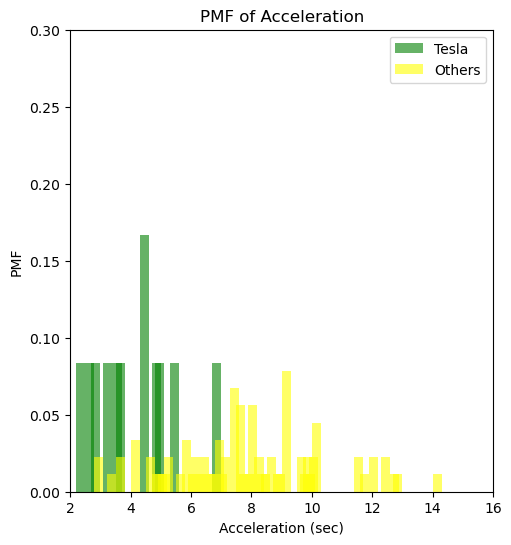

In [55]:
tesla_acc_pmf = thinkstats2.Pmf(tesla2.AccelSec, label="Tesla")
others_acc_pmf = thinkstats2.Pmf(others2.AccelSec, label="Others")

width = 0.3
axis = [2, 16, 0, 0.3]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(tesla_acc_pmf, align="right", width=width, color='green')
thinkplot.Hist(others_acc_pmf, align="left", width=width, color = 'yellow')
thinkplot.Config(xlabel="Acceleration (sec)", ylabel="PMF", axis=axis, title = "PMF of Acceleration")



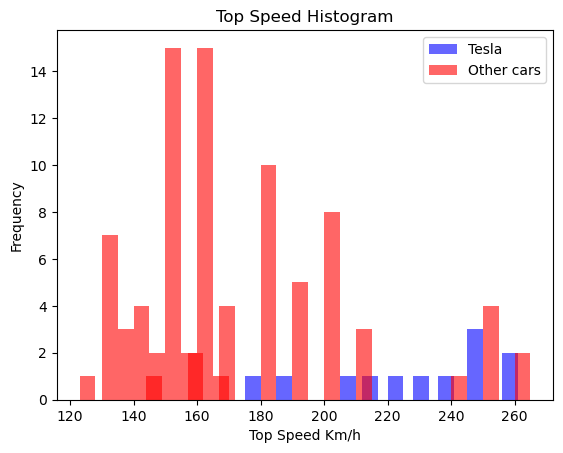

<Figure size 800x600 with 0 Axes>

In [53]:
tesla_hist = thinkstats2.Hist(tesla.TopSpeed_KmH)
others_hist = thinkstats2.Hist(others.TopSpeed_KmH)
thinkplot.PrePlot(2)
thinkplot.Hist(tesla_hist, align = 'right', width = 5, color = 'blue', label = 'Tesla')
thinkplot.Hist(others_hist, align = 'left', width = 5, color = 'red', label = "Other cars")
thinkplot.Show(xlabel = 'Top Speed Km/h', ylabel ='Frequency', title = "Top Speed Histogram")


##### Visualizing the distribution is somewhat challenging; nevertheless, it is apparent that Tesla's top speed distribution is skewed towards higher speeds. Next I will  visualize PMF distribution for top speed comparing Teslas to others.

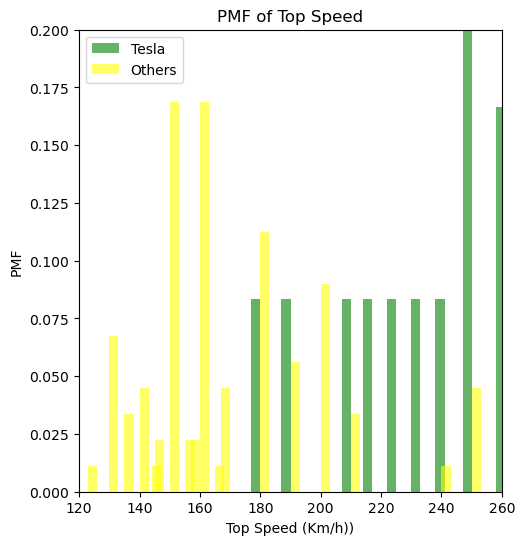

In [61]:
tesla_speed_pmf = thinkstats2.Pmf(tesla2.TopSpeed_KmH, label="Tesla")
others_speed_pmf = thinkstats2.Pmf(others2.TopSpeed_KmH, label="Others")

width = 3
axis = [120, 260, 0, 0.2]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(tesla_speed_pmf, align="right", width=width, color='green')
thinkplot.Hist(others_speed_pmf, align="left", width=width, color = 'yellow')
thinkplot.Config(xlabel="Top Speed (Km/h))", ylabel="PMF", axis=axis, title = "PMF of Top Speed")

##### Upon analyzing the Probability Mass Function (PMF) for these two parameters, it becomes evident that the distribution of Tesla cars has a higher probability of attaining higher speeds and concurrently exhibits a higher likelihood of lower acceleration.

## CDF 

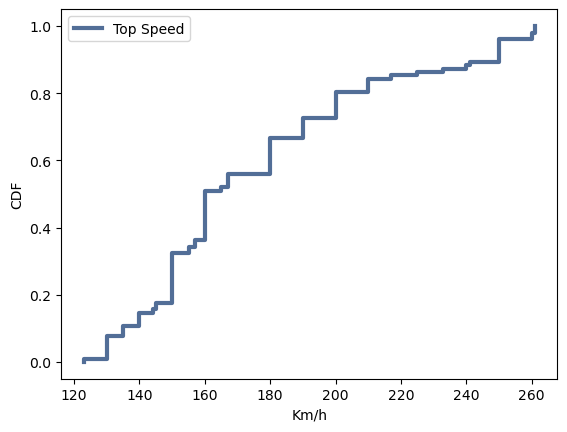

<Figure size 800x600 with 0 Axes>

In [62]:
# Calculate and  plot CDF for Top speeds
cdf_speed = thinkstats2.Cdf(ev_data_exc.TopSpeed_KmH, label = "Top Speed")
thinkplot.Cdf(cdf_speed)
thinkplot.Show(xlabel= "Km/h", ylabel = "CDF")

##### From  the visualization of the Cumulative Distribution Function (CDF), it is apparent that only 40% of the cars possess a top speed exceeding 170 km/h. Comparing this to the top speed histograms presented earlier, it is evident that Tesla cars consistently surpass the 170 km/h threshold, with the mode centered around 250 km/h, a figure found in only 10% of all cars. This observation strongly suggests that Teslas exhibit notable speed characteristics.

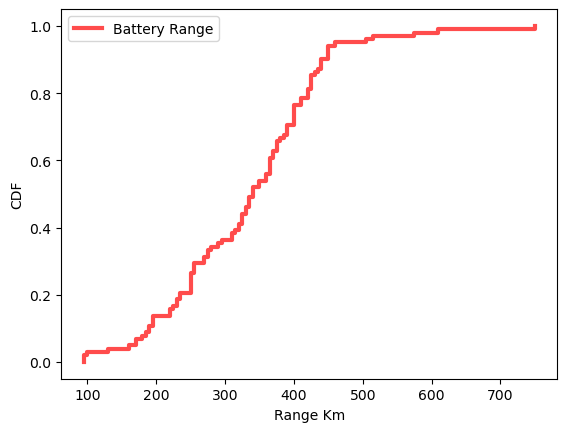

<Figure size 800x600 with 0 Axes>

In [63]:
# Compute  and visualize CDF for battery range parameter 
cdf_bat = thinkstats2.Cdf(ev_data_exc.Range_Km, label = "Battery Range")
thinkplot.Cdf(cdf_bat, color = 'red')
thinkplot.Show(xlabel= "Range Km", ylabel = "CDF")

##### In terms of battery range Tesla cars are also in higher percentile , around 75%

## Normal Distribution Plot

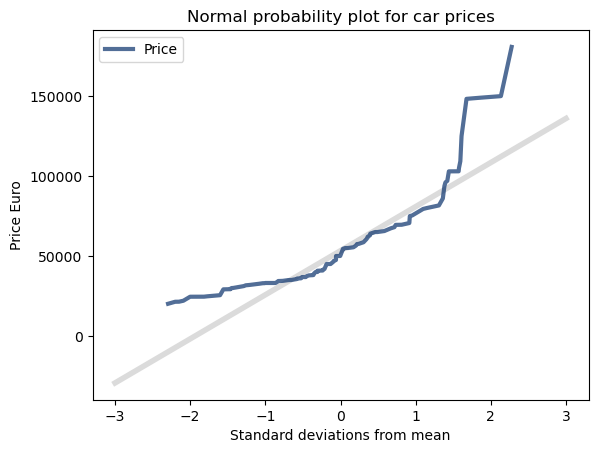

In [65]:
# Define a fucntion to generate CDF plot
def MakeNormalModel(df):
  
    cdf = thinkstats2.Cdf(ev_data_exc.PriceEuro, label="Price(Euro)")

    mean, var = thinkstats2.TrimmedMeanVar(ev_data_exc.PriceEuro)
    std = np.sqrt(var)
    print("n, mean, std", len(ev_data_exc.PriceEuro), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label="model", linewidth=4, color="0.8")
    thinkplot.Cdf(cdf)
    
    
mean, var = thinkstats2.TrimmedMeanVar(ev_data_exc.PriceEuro, p=0.01)
std = np.sqrt(var)

xs = [-3, 3]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

xs, ys = thinkstats2.NormalProbability(ev_data_exc.PriceEuro)
thinkplot.Plot(xs, ys, label="Price")

thinkplot.Config(
    title="Normal probability plot for car prices",
    xlabel="Standard deviations from mean",
    ylabel="Price Euro",
)

##### The normal distribution plot effectively characterizes the distribution of prices within the range of ±1 standard deviation from the mean. However, for both cheaper and more expensive cars, the prices deviate from what a normal distribution would predict. Cheaper cars are relatively pricier than the normal distribution suggests, while more expensive cars exceed the expectations of a normal distribution. In light of this, I intend to plot a lognormal distribution to explore whether it provides a better representation of the distribution of EV prices.

n, mean, std 102 53326.81 27567.90242644333


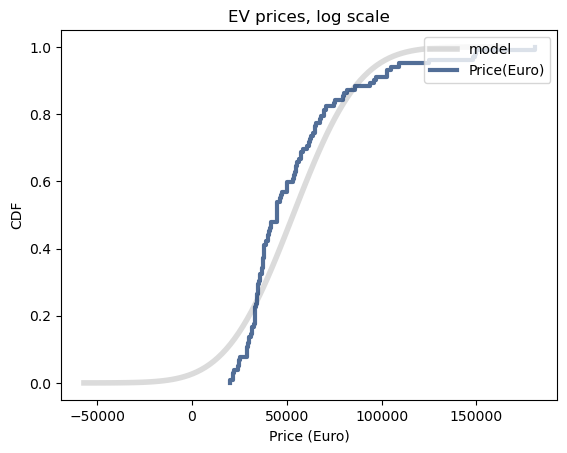

In [66]:
# Calculate log  of prices and plot the distribution
log_prices = np.log10(ev_data_exc.PriceEuro)
MakeNormalModel(log_prices)
thinkplot.Config(
    title="EV prices, log scale",
    xlabel="Price (Euro)",
    ylabel="CDF",
    loc="upper right",
)

##### The log-normal distribution plot offers a relatively better fit for describing the distribution of EV prices.

## Scatter Plots

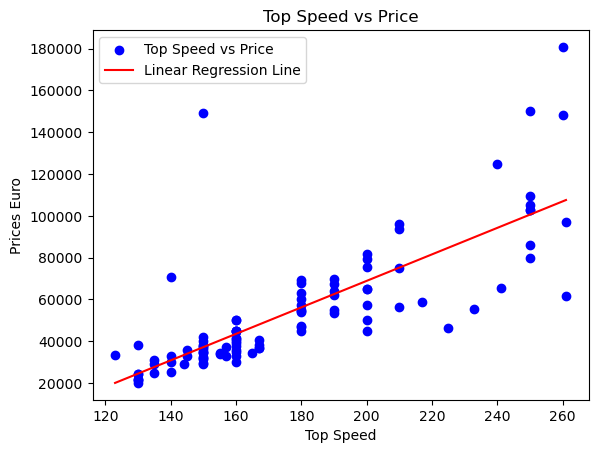

In [67]:
# Define parameters for the regression line
slope, intercept, r_value, p_value, std_err = linregress(ev_data_exc.TopSpeed_KmH, ev_data_exc.PriceEuro)

# Generate scatter plot
plt.scatter(ev_data_exc.TopSpeed_KmH,ev_data_exc.PriceEuro, color='blue', marker = 'o', label = 'Top Speed vs Price')

# Add a regression line
x_line = np.array([min(ev_data_exc.TopSpeed_KmH), max(ev_data_exc.TopSpeed_KmH)])
y_line = intercept + slope * x_line
plt.plot(x_line, y_line, color='red', label='Linear Regression Line')

# Add titles and labels
plt.xlabel('Top Speed')
plt.ylabel('Prices Euro')
plt.title ('Top Speed vs Price')
plt.legend()
plt.show()



##### Through scatter plot analysis, it is evident that a robust positive relationship exists between top speed and price for electric vehicles (EVs).

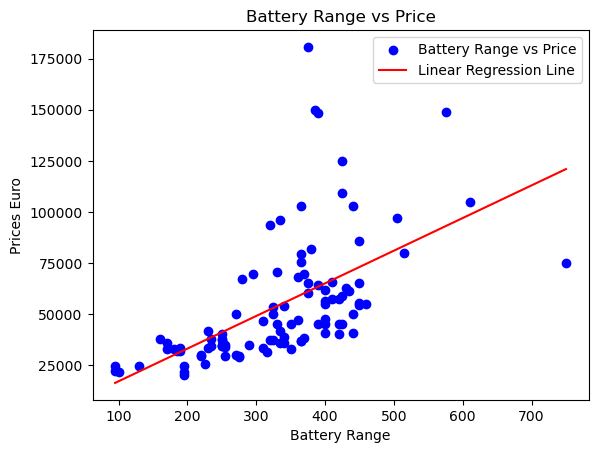

In [78]:
# Define parameters for the regression line
slope, intercept, r_value, p_value, std_err = linregress(ev_data_exc.Range_Km, ev_data_exc.PriceEuro)
# Generate scatter plot
plt.scatter(ev_data_exc.Range_Km,ev_data_exc.PriceEuro, color='blue', marker = 'o', label = 'Battery Range vs Price')

#Add a regression line
x_line = np.array([min(ev_data_exc.Range_Km), max(ev_data_exc.Range_Km)])
y_line = intercept + slope * x_line
plt.plot(x_line, y_line, color='red', label='Linear Regression Line')

# Add titles and labels
plt.xlabel('Battery Range')
plt.ylabel('Prices Euro')
plt.title ('Battery Range vs Price')
plt.legend()
plt.show()

##### The scatter plot depicting battery range and car prices reveals a positive relationship between these two parameters. However, it is notable that the prices exhibit a bit more variability for cars with higher battery ranges.

In [70]:
# Define the Covariance function to determine covariance between top speed and price, and battery range and price. 
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [71]:
cov_speed = Cov(ev_data_exc.TopSpeed_KmH,ev_data_exc.PriceEuro)
cov_range =  Cov(ev_data_exc.Range_Km,ev_data_exc.PriceEuro)
print("The covariance bewtween top speed and price is:",cov_speed )
print("The covariance bewtween range and price is:",cov_range )


The covariance bewtween top speed and price is: 869354.8161284121
The covariance bewtween range and price is: 1908038.662533641


##### Both the top speed parameter and the range exhibit positive covariance with the price, although the strength of this relationship is not notably pronounced. Subsequently, the Pearson correlation will be calculated for a more quantitative evaluation of the association between these two variables.

In [72]:
# Define Pearson correlation function used in Think Stats book
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [73]:
corr_speed = Corr(ev_data_exc.TopSpeed_KmH,ev_data_exc.PriceEuro)
corr_range =  Corr(ev_data_exc.Range_Km,ev_data_exc.PriceEuro)
print("The Pearson's correlation coefficient bewtween top speed and price is:",corr_speed )
print("The Pearson's correlation coefficient bewtween range and price is:",corr_range )


The Pearson's correlation coefficient bewtween top speed and price is: 0.7764245697218719
The Pearson's correlation coefficient bewtween range and price is: 0.577602296118171


##### In general, these two parameters could serve as effective predictors for car prices, as they both demonstrate a strong positive correlation with the price variable. Additionally, to account for outliers in the dataset and the non-perfectly linear nature of the correlation, I intend to calculate Spearman's correlation rank.

In [74]:
# Define a function to calculate Spearman correlation
def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [75]:
spear_corr_speed = SpearmanCorr(ev_data_exc.TopSpeed_KmH,ev_data_exc.PriceEuro)
spear_corr_range =  SpearmanCorr(ev_data_exc.Range_Km,ev_data_exc.PriceEuro)
print("The Spearman's correlation coefficient bewtween top speed and price is:",spear_corr_speed )
print("The Spearman's correlation coefficient bewtween range and price is:",spear_corr_range )

The Spearman's correlation coefficient bewtween top speed and price is: 0.8525779573405886
The Spearman's correlation coefficient bewtween range and price is: 0.7537320784663051


##### Based on the obtained results for the two different types of correlation, it is evident that Spearman's correlation is more applicable to these variables. There is a correlation coefficient of 0.85 for top speed to price and 0.75 for battery range to price.

## Hypothesis Testing

##### To answer the question if Tesla cars significantly faster than other EV I want to test two hypothesis:



##### Null Hypothesis (H0):
##### There is no significant difference in the top speed and acceleration of Tesla electric vehicles compared to other manufacturers
#### Alternative Hypothesis (H1):
##### Tesla electric vehicles have either a higher top speed or faster acceleration compared to other manufacturers

In [76]:
tesla_top_speed = tesla.TopSpeed_KmH  
others_top_speed = others.TopSpeed_KmH 

tesla_acceleration = tesla.AccelSec  
others_accel = others.AccelSec 

# Perform Two-Sample t-tests
t_stat_top_speed, p_value_top_speed = stats.ttest_ind(tesla_top_speed, others_top_speed)
t_stat_accel, p_value_accel = stats.ttest_ind(tesla_acceleration, others_accel)

alpha = 0.05

# Check for Top Speed
if p_value_top_speed < alpha:
    print("Reject the null hypothesis for top speed")
else:
    print("Fail to reject the null hypothesis for top speed")

# Check for Acceleration
if p_value_accel < alpha:
    print("Reject the null hypothesis for acceleration")
else:
    print("Fail to reject the null hypothesis for acceleration")

print ("T statistics for the top speed hypothesis:" , t_stat_top_speed, "p-value for the top speed hypothesis:", p_value_top_speed)
print ("T statistics for the acceleration hypothesis:", t_stat_accel, "p-value for the acceleration hypothesis:" , p_value_accel)



Reject the null hypothesis for top speed
Reject the null hypothesis for acceleration
T statistics for the top speed hypothesis: 6.248005320456953 p-value for the top speed hypothesis: 1.022737777876629e-08
T statistics for the acceleration hypothesis: -4.261290437403599 p-value for the acceleration hypothesis: 4.6061132267831526e-05


##### Both null hypotheses were rejected, indicating that there is statistical evidence to support the assertion that Tesla electric vehicles have significantly higher top speeds and faster acceleration compared to other electric vehicles. The results suggest a notable performance advantage in terms of both top speed and acceleration for Tesla cars in the studied dataset.

## Modeling

#####  For the modeling portion, I decided to try to create a linear regression model that predicts the price of the car based on its parameters like top speed, acceleration, battery range, efficiency, and fast charge. 

In [79]:
# Generate a linear model and provide the summary
model = smf.ols('PriceEuro ~ AccelSec + TopSpeed_KmH + Range_Km + Efficiency_WhKm + FastCharge_KmH', data=ev_data_exc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     7.842
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           1.41e-11
Time:                        20:58:01   Log-Likelihood:                -1081.4
No. Observations:                 102   AIC:                             2271.
Df Residuals:                      48   BIC:                             2413.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6.246e+04   3.19e+04     -1.955      0.056   -1.27e+05    1772.093
FastCharge_KmH[T.170] -1.073e+04    1.1e+04     -0.971      0.337   -3.29e+04    1.15e+04
FastCharge_KmH[T.190]  2059.1460    1.1e+04      0.187      0.853   -2.01e+04    2.42e+04
FastCharge_KmH[T.210] -1.347e+04   1.27e+04     -1.063      0.293   -3.89e+04     1.2e+04
FastCharge_KmH[T.220] -8823.8851    1.3e+04     -0.681      0.499   -3.49e+04    1.72e+04
FastCharge_KmH[T.230]  -1.35e+04   1.09e+04     -1.237      0.222   -3.55e+04    8450.296
FastCharge_KmH[T.240] -2602.5614   1.65e+04     -0.157      0.876   -3.59e+04    3.07e+04
FastCharge_KmH[T.250] -2.179e+04   1.67e+04     -1.304      0.199   -5.54e+04    1.18e+04
FastCharge_KmH[T.260] -2734.4903    1.3e+04     -0.211      0.834   -2.88e+04    2.33e+04
FastCharge_KmH[T.270] -6360.6963   1.41e+04     -0.451      0.654   -3.47e+04     2.2e+04
FastCharge_KmH[T.290]  1.923e+04   2.16e+04      0.888      0.379   -2.43e+04    6.27e+04
FastCharge_KmH[T.320] -2.694e+04   1.85e+04     -1.458      0.151   -6.41e+04    1.02e+04
FastCharge_KmH[T.330] -7436.8646   1.37e+04     -0.543      0.590    -3.5e+04    2.01e+04
FastCharge_KmH[T.340] -1.275e+04   1.63e+04     -0.782      0.438   -4.55e+04       2e+04
FastCharge_KmH[T.350] -2.227e+04   1.54e+04     -1.448      0.154   -5.32e+04    8650.834
FastCharge_KmH[T.360] -9846.7370   1.91e+04     -0.517      0.608   -4.82e+04    2.85e+04
FastCharge_KmH[T.380] -1.343e+04   1.23e+04     -1.093      0.280   -3.81e+04    1.13e+04
FastCharge_KmH[T.390] -1.273e+04   1.47e+04     -0.867      0.390   -4.23e+04    1.68e+04
FastCharge_KmH[T.410] -1.208e+04   2.06e+04     -0.585      0.561   -5.36e+04    2.94e+04
FastCharge_KmH[T.420] -1.579e+04   1.33e+04     -1.186      0.242   -4.26e+04     1.1e+04
FastCharge_KmH[T.430] -2.422e+04   2.04e+04     -1.187      0.241   -6.52e+04    1.68e+04
FastCharge_KmH[T.440] -1.489e+04   1.36e+04     -1.098      0.278   -4.22e+04    1.24e+04
FastCharge_KmH[T.450] -2485.6087   1.64e+04     -0.152      0.880   -3.55e+04    3.05e+04
FastCharge_KmH[T.460] -9774.3939   2.09e+04     -0.467      0.643   -5.19e+04    3.23e+04
FastCharge_KmH[T.470] -9915.1701   1.41e+04     -0.705      0.484   -3.82e+04    1.84e+04
FastCharge_KmH[T.480] -7005.3266   1.79e+04     -0.392      0.697   -4.29e+04    2.89e+04
FastCharge_KmH[T.490] -2.317e+04   1.62e+04     -1.427      0.160   -5.58e+04    9479.378
FastCharge_KmH[T.500] -2.422e+04   2.01e+04     -1.207      0.233   -6.46e+04    1.61e+04
FastCharge_KmH[T.510]  2.144e+04   2.08e+04      1.031      0.308   -2.04e+04    6.33e+04
FastCharge_KmH[T.520] -1.984e+04   2.06e+04     -0.965      0.339   -6.12e+04    2.15e+04
FastCharge_KmH[T.540]  5276.6885   1.52e+04      0.347      0.730   -2.53e+04    3.59e+04
FastCharge_KmH[T.550] -

##### The linear regression model applied to the dataset, with "PriceEuro" as the dependent variable, demonstrates strong performance as indicated by a high R-squared value of 0.896, signifying that approximately 89.6% of the variability in "PriceEuro" is explained by the model's independent variables. The adjusted R-squared, slightly lower at 0.782, suggests some caution regarding potential overfitting. The F-statistic of 7.842, accompanied by a very low p-value (1.41e-11), underscores the statistical significance of the overall model. The log-likelihood is -1081.4, reflecting the model's ability to explain the observed data. AIC and BIC values of 2271 and 2413, respectively, provide measures of model quality, with lower values being preferable. The dataset comprises 102 observations, and the model involves 53 parameters with 48 degrees of freedom for residuals. The covariance type is specified as "nonrobust," indicating that standard errors are not adjusted for potential issues such as heteroscedasticity. Overall, while the model displays a robust fit, considerations should be given to the adjusted R-squared and diagnostic measures to ensure the model's validity and relevance of included variables.

## Conclusion

##### In conclusion, thank you, Professor Jim, for delivering such a captivating class. This course has been a great learning experience, providing insights into the practical applications of statistics for extracting information from data. I truly enjoyed the course, particularly the final project, which allowed for hands-on application of the concepts we learned. Now, let's delve back into the results of the analysis.
##### The comprehensive examination of Tesla cars' performance relative to other electric vehicles (EVs) has yielded valuable insights, drawing upon various statistical measures and modeling techniques. The analysis covered crucial aspects such as top speed, acceleration, battery range, and how these factors can be used to model their impact on pricing.
##### The statistical tools employed for this study, including different visualizations, Probability Mass Function and Cumulative Distribution Function calculations and plotting, analytical distribution determination, hypothesis testing, and modeling, helped in answering research questions and comparing Tesla cars to other EVs. The primary research question has been conclusively addressed, and the statistical analysis confirms that Tesla cars exhibit higher performance in terms of top speed and acceleration compared to other EVs.
##### The statistical evidence supports the hypothesis that Tesla cars tend to have higher top speeds, faster accelerations, and potentially greater efficiency, all of which influence their market pricing. Additionally, the linear regression model reinforces these observations, providing a quantitative framework for predicting car prices based on the performance parameters.
##### Despite the comprehensive nature of the analysis, certain limitations merit acknowledgment. While informative, the dataset's size may not capture the full diversity of the current electric vehicle market. Additionally, excluding specific variables that could influence pricing warrants consideration in future research. One of my assumptions was that Tesla has a higher efficiency; however, analyzing the comparison in efficiency distribution did not support my assumption. This implies that high speed and fast acceleration come with decreased efficiency for Tesla.
##### Future studies can explore the impact of emerging technologies, government incentives, and environmental factors on the electric vehicle market. Further refinements to the predictive model, such as addressing potential multicollinearity among independent variables, could enhance its accuracy and practical applicability.
##### Finally, this analysis contributes significantly to understanding the electric vehicle market, particularly in comparing the performance of Tesla cars to other EVs. Integrating statistical measures and modeling techniques has provided valuable insights into the factors influencing electric vehicle pricing, setting the stage for continued exploration and refinement in this rapidly evolving automotive landscape.
